In [155]:
# 1. Seleccionar 2 imagenes
# 2. Agregar ruido de sal y pimienta o alguna otra anomalia
# 3. Selecciona dos tecnicas para eliminar el ruido o la anomalida
# Una con desarrollo propio, la otra con OpenCV
# 4. Realizar pruebas con las 2 tecnicas
# 5. Identifica una medida de desempe;o cuantitativa que permita seleccionar
# la mejor imagen con los mejores parametros (utilizar la img original)
# 6. Comparar y concluir

In [156]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [157]:
def imshow(title="Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize = (size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [158]:
img01 = cv2.imread("flowers.jpeg", cv2.IMREAD_GRAYSCALE)
img01

array([[49, 49, 49, ..., 31, 29, 26],
       [49, 49, 49, ..., 29, 27, 25],
       [49, 49, 49, ..., 27, 27, 25],
       ...,
       [40, 40, 39, ..., 16, 16, 16],
       [40, 40, 39, ..., 16, 16, 16],
       [40, 40, 39, ..., 16, 16, 16]], dtype=uint8)

In [159]:
# Agregando imagen a ruido

def agregar_ruido_aleatorio(image_ref = None, probabilidad = 0.00):
    
    # Obtener alto y ancho
    h,w = image_ref.shape

    # Crea un arreglo de ceros con el alto y ancho
    img_a_llenar = np.zeros((h,w), np.uint8)
    
    for j in range(h):
        for i in range(w):
            if(random.randint(0,int(100 - probabilidad)) == 1):
                # Agrega en la posicion del pixel un arreglo aleatorio
                img_a_llenar[j,i] = random.randint(0,255)
            else:
                # Agrega en el pixel el valor de la img original
                img_a_llenar[j,i]=img01[j,i]     
                
    # Nueva img02
    imshow("agregar_ruido_aleatorio", img_a_llenar)
    
    return img_a_llenar
    


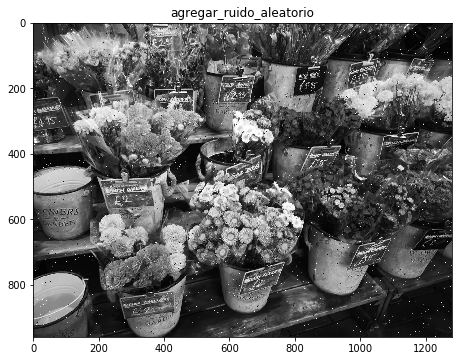

array([[49, 49, 49, ..., 31, 29, 26],
       [49, 49, 49, ..., 29, 27, 25],
       [49, 49, 49, ..., 27, 27, 25],
       ...,
       [40, 40, 39, ..., 16, 16, 16],
       [40, 40, 39, ..., 16, 16, 16],
       [40, 40, 39, ..., 16, 16, 16]], dtype=uint8)

In [160]:
agregar_ruido_aleatorio(img01, 0.15)

In [161]:
def agregarRuidoFunClase(image = None, probabilidad = 0.00):
    
    # Crear una matriz
    ruido =  np.zeros_like(image)
    
    # Generar valores de ruido
    cv2.randu(ruido, 0, 255)
    
    # Copia de la imagen como parametro
    img_con_ruido = image.copy()
    
    # Agregando ruido de la imagen
    img_con_ruido[ruido < int(255 * probabilidad / 2)] = 0
    img_con_ruido[ruido > 255 - int(255 * probabilidad / 2)] = 2
    
    # Mostrar resultado
    imshow("IMG RUIDO CON CODIGO DE CLASE", img_con_ruido)
    
    return img_con_ruido
    
    

In [162]:
def agregar_ruido_2(image = None, probabilidad = 0.00):
    
    # Copia de imagen
    img_con_ruido = np.copy(image)
    
    # Generar mascaras con 
    mascara_negra = np.random.rand(*image.shape[:2]) < probabilidad / 2
    img_con_ruido[mascara_negra] = 255
    
    mascara_blanca = np.random.rand(*image.shape[:2]) < probabilidad / 2
    img_con_ruido[mascara_blanca] = 0
    
    
    # Mostrar resultado
    imshow("agregar_ruido_2", img_con_ruido)
    
    return img_con_ruido

    

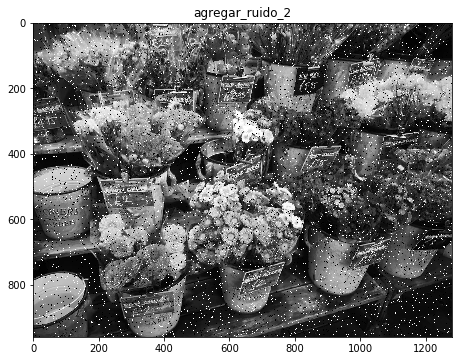

In [163]:
generar_img_con_ruido_open_cv = agregar_ruido_2(img01, 0.05)

In [164]:
# blur = cv2.GaussianBlur(img01, (5,5), 0)
# imshow("BLUR", blur)
# DOC https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

In [230]:
## Intentar reducir una imagen
h,w = img01.shape
factor_reduccion = 10

In [231]:
img_to_reduce = np.zeros((int(h/factor_reduccion), int(w/factor_reduccion)), np.uint8)

In [232]:
img_to_reduce.shape
print(f"Total Pixeles: { int(img_to_reduce.shape[0]) * int(img_to_reduce.shape[1])  }")

Total Pixeles: 12288


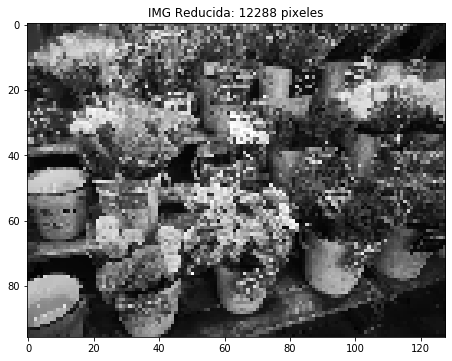

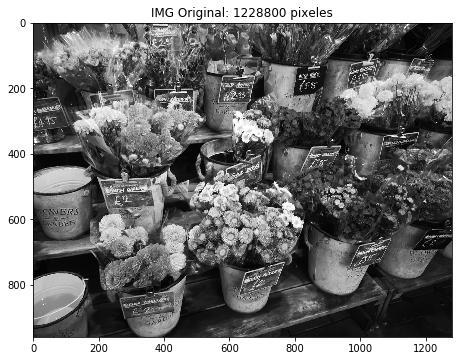

In [243]:
for j in range(h):
    for i in range(w):
        if((j < int(h/factor_reduccion)) and (i < int(w/factor_reduccion))):
           img_to_reduce[j,i] = img01[j * factor_reduccion, i * factor_reduccion]
        else:
            break
                    
imshow(f"IMG Reducida: { int(img_to_reduce.shape[0]) * int(img_to_reduce.shape[1])  } pixeles", img_to_reduce) 
imshow(f"IMG Original: { int(img01.shape[0]) * int(img01.shape[1])  } pixeles", img01) 